In [65]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchinfo import summary
import torch.optim as optim
from torchviz import make_dot

In [11]:
torch.manual_seed(123)

# 入力1, 出力1の線形モデル
l1 = nn.Linear(1, 1)
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [5]:
# パラメータの確認
for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [6]:
# 初期値設定
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [9]:
# テスト用データの作成
x_np = np.arange(-2, 2.1, 1)

x = torch.tensor(x_np).float()

# サイズ(1, N)からを(N, 1)に変更
x = x.view(-1, 1)

print(x_np.shape)
print(x.shape)
print(x_np)
print(x)

(5,)
torch.Size([5, 1])
[-2. -1.  0.  1.  2.]
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [10]:
y = l1(x)

print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [12]:
# 入力2, 出力1の線形モデル
l2 = nn.Linear(2, 1)

nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [14]:
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [16]:
y2 = l2(x2)
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [17]:
# 入力2, 出力3の線形モデル
l3 = nn.Linear(2, 3)

# 重みとバイアスの初期化
nn.init.constant_(l3.weight[0, :], 1.0)
nn.init.constant_(l3.weight[1, :], 2.0)
nn.init.constant_(l3.weight[2, :], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [18]:
y3 = l3(x2)
print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


In [22]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
    
    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [24]:
inputs = torch.ones(100, 1)

n_input = 1
n_output = 1
net = Net(n_input, n_output)

# netは関数として動作する
outputs = net(inputs)

In [40]:
# 学習用データ準備
# ボストンデータセットを使用
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

print('元データ：', x_org.shape, yt.shape)
print('特徴量名：', feature_names)

元データ： (506, 13) (506,)
特徴量名： ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [87]:
# 部屋数のみを用いた単回帰モデルの作成
x = x_org[:, feature_names == 'RM']
print(x.shape)
print(x[:5, :])

print('正解データ：', yt[:5])

(506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ： [24.  21.6 34.7 33.4 36.2]


Text(0.5, 1.0, 'Boston House Prices dataset')

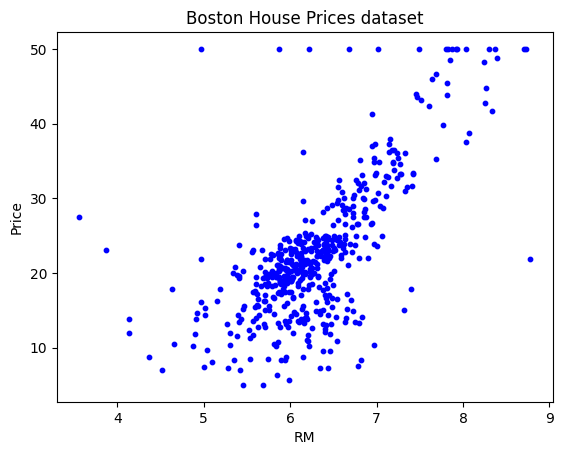

In [88]:
# 散布図の表示
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('Boston House Prices dataset')

In [89]:
n_input = x.shape[1]
n_output = 1
print(n_input, n_output)

1 1


In [90]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

        nn.init.normal_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

In [91]:
summary(Net(1, 1), (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [97]:
# 単回帰モデル
lr = 0.01

net = Net(n_input, n_output)

criterion = nn.MSELoss()

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 50000

history = np.zeros((0,2))

for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, labels1) / 2

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 104.12473
Epoch 100 loss: 29.57990
Epoch 200 loss: 29.39504
Epoch 300 loss: 29.21458
Epoch 400 loss: 29.03840
Epoch 500 loss: 28.86641
Epoch 600 loss: 28.69851
Epoch 700 loss: 28.53459
Epoch 800 loss: 28.37457
Epoch 900 loss: 28.21836
Epoch 1000 loss: 28.06585
Epoch 1100 loss: 27.91697
Epoch 1200 loss: 27.77163
Epoch 1300 loss: 27.62974
Epoch 1400 loss: 27.49121
Epoch 1500 loss: 27.35599
Epoch 1600 loss: 27.22398
Epoch 1700 loss: 27.09510
Epoch 1800 loss: 26.96928
Epoch 1900 loss: 26.84646
Epoch 2000 loss: 26.72655
Epoch 2100 loss: 26.60950
Epoch 2200 loss: 26.49522
Epoch 2300 loss: 26.38366
Epoch 2400 loss: 26.27475
Epoch 2500 loss: 26.16843
Epoch 2600 loss: 26.06464
Epoch 2700 loss: 25.96331
Epoch 2800 loss: 25.86439
Epoch 2900 loss: 25.76782
Epoch 3000 loss: 25.67354
Epoch 3100 loss: 25.58150
Epoch 3200 loss: 25.49166
Epoch 3300 loss: 25.40395
Epoch 3400 loss: 25.31831
Epoch 3500 loss: 25.23471
Epoch 3600 loss: 25.15311
Epoch 3700 loss: 25.07344
Epoch 3800 loss: 24.995

In [98]:
print(f'損失初期値：{history[0, 1]:.5f}')
print(f'損失最終値：{history[-1, 1]:.5f}')

損失初期値：104.12473
損失最終値：21.80033


Text(0.5, 1.0, 'Training Curve')

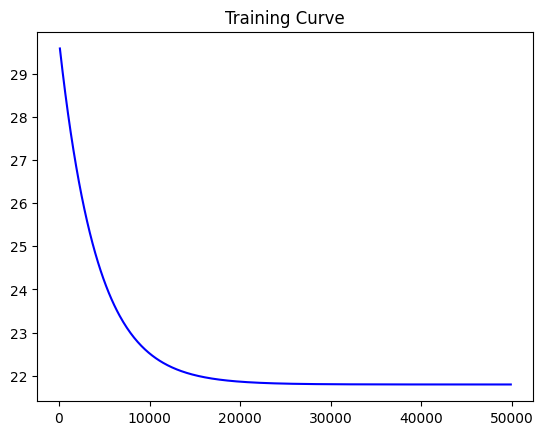

In [100]:
# 学習曲線の表示
plt.plot(history[1:,0], history[1:,1], 'b')
plt.title('Training Curve')

In [102]:
# 重回帰モデル
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [103]:
n_inputs = x2.shape[1]
n_outputs = 1

inputs = torch.tensor(x2).float()
labels2 = torch.tensor(yt).float().view(-1, 1)

lr = 0.01

history = np.zeros((0, 2))

num_epochs = 50000

net = Net(n_inputs, n_outputs)

optimizer = optim.SGD(net.parameters(), lr=lr)

criterion = nn.MSELoss()

for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, labels2) / 2

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 122.76466
Epoch 100 loss: 124815961814362881671317946368.00000
Epoch 200 loss: inf
Epoch 300 loss: nan
Epoch 400 loss: nan
Epoch 500 loss: nan
Epoch 600 loss: nan
Epoch 700 loss: nan
Epoch 800 loss: nan
Epoch 900 loss: nan
Epoch 1000 loss: nan
Epoch 1100 loss: nan
Epoch 1200 loss: nan
Epoch 1300 loss: nan
Epoch 1400 loss: nan
Epoch 1500 loss: nan
Epoch 1600 loss: nan
Epoch 1700 loss: nan
Epoch 1800 loss: nan
Epoch 1900 loss: nan
Epoch 2000 loss: nan
Epoch 2100 loss: nan
Epoch 2200 loss: nan
Epoch 2300 loss: nan
Epoch 2400 loss: nan
Epoch 2500 loss: nan
Epoch 2600 loss: nan
Epoch 2700 loss: nan
Epoch 2800 loss: nan
Epoch 2900 loss: nan
Epoch 3000 loss: nan
Epoch 3100 loss: nan
Epoch 3200 loss: nan
Epoch 3300 loss: nan
Epoch 3400 loss: nan
Epoch 3500 loss: nan
Epoch 3600 loss: nan
Epoch 3700 loss: nan
Epoch 3800 loss: nan
Epoch 3900 loss: nan
Epoch 4000 loss: nan
Epoch 4100 loss: nan
Epoch 4200 loss: nan
Epoch 4300 loss: nan
Epoch 4400 loss: nan
Epoch 4500 loss: nan
Epoch 4

変数を増やした結果，損失が発散した

In [104]:
# 学習率の変更
n_inputs = x2.shape[1]
n_outputs = 1

inputs = torch.tensor(x2).float()
labels2 = torch.tensor(yt).float().view(-1, 1)

lr = 0.0001

history = np.zeros((0, 2))

num_epochs = 50000

net = Net(n_inputs, n_outputs)

optimizer = optim.SGD(net.parameters(), lr=lr)

criterion = nn.MSELoss()

for epoch in range(num_epochs):
    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, labels2) / 2

    loss.backward()

    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 300.52783
Epoch 100 loss: 211.56775
Epoch 200 loss: 172.63914
Epoch 300 loss: 141.62904
Epoch 400 loss: 116.73174
Epoch 500 loss: 96.74079
Epoch 600 loss: 80.68932
Epoch 700 loss: 67.80101
Epoch 800 loss: 57.45253
Epoch 900 loss: 49.14331
Epoch 1000 loss: 42.47157
Epoch 1100 loss: 37.11459
Epoch 1200 loss: 32.81324
Epoch 1300 loss: 29.35956
Epoch 1400 loss: 26.58645
Epoch 1500 loss: 24.35983
Epoch 1600 loss: 22.57198
Epoch 1700 loss: 21.13647
Epoch 1800 loss: 19.98383
Epoch 1900 loss: 19.05834
Epoch 2000 loss: 18.31523
Epoch 2100 loss: 17.71855
Epoch 2200 loss: 17.23946
Epoch 2300 loss: 16.85478
Epoch 2400 loss: 16.54591
Epoch 2500 loss: 16.29791
Epoch 2600 loss: 16.09878
Epoch 2700 loss: 15.93889
Epoch 2800 loss: 15.81050
Epoch 2900 loss: 15.70741
Epoch 3000 loss: 15.62464
Epoch 3100 loss: 15.55818
Epoch 3200 loss: 15.50481
Epoch 3300 loss: 15.46196
Epoch 3400 loss: 15.42756
Epoch 3500 loss: 15.39993
Epoch 3600 loss: 15.37775
Epoch 3700 loss: 15.35994
Epoch 3800 loss: 15

In [105]:
print(f'損失初期値：{history[0,1]:.5f}')
print(f'損失最終値：{history[-1, 1]:.5f}')

損失初期値：300.52783
損失最終値：15.28569


Text(0.5, 1.0, 'Training Curve')

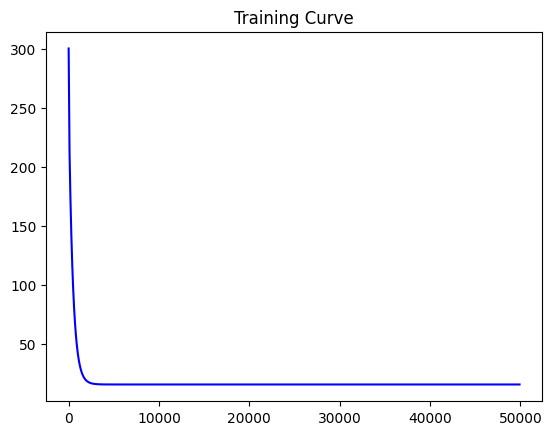

In [106]:
plt.plot(history[:,0], history[:,1], 'b')
plt.title('Training Curve')